In [1]:
pip install pywaffle

     |████████████████████████████████| 526 kB 6.8 MB/s 


In [2]:
pip install squarify

In [3]:
pip install pygal

     |████████████████████████████████| 127 kB 8.3 MB/s 


In [4]:
pip install plotly-express

In [5]:
pip install --upgrade plotly

     |████████████████████████████████| 23.9 MB 1.5 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import squarify

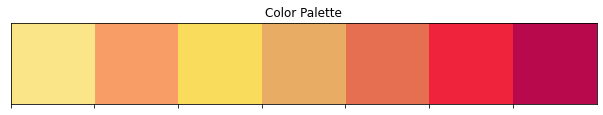

In [7]:
#Defining Colors for visualization
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c']
palette = sns.color_palette(palette = colors)

sns.palplot(palette, size =1.5)
plt.title("Color Palette")
plt.show()

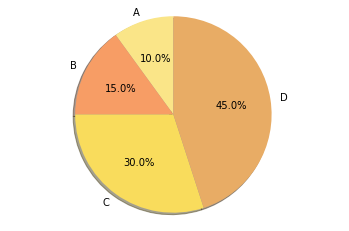

In [8]:
#sample pie chart in Matplotlib
labels = 'A', 'B', 'C', 'D'
sizes = [10, 15, 30, 45]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', startangle=90, shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

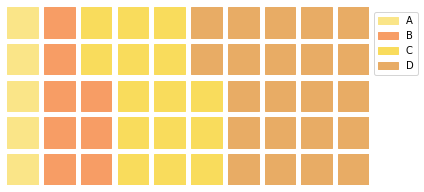

In [9]:
#sample waffle chart using pywaffle
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65']
from pywaffle import Waffle
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=10,  # Either rows or columns could be omitted
    values={'A':10, 'B':15,'C':30,'D':45},
    block_arranging_style='new-line',
    vertical=False,
    colors=colors,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)
fig.show()

# Sample TreeMap use cases

#1.	Displaying region-wise customer complaints for a product

In [10]:
import plotly.graph_objects as go

fig = go.Figure(go.Treemap(
    labels = ["Regions","East", "West", "North", "South","C1","C2","C3","C4","C5","C6","C7","C8","C9","C10"],
    parents = ["", "Regions","Regions","Regions","Regions","East","East","West","North","East","North","West","South","East","West","North"],
    root_color="lightgrey"
))
fig.update_layout(width=400, height=300,margin = dict(t=10, l=5, r=15, b=5),treemapcolorway = colors)
fig.show()

#2.	Showcasing category-wise product availability like mobile phones

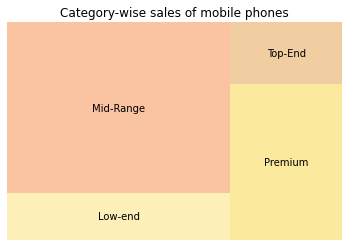

In [11]:
sizes=[15, 55,25, 10]
label=["Low-end", "Mid-Range", "Premium","Top-End",]
squarify.plot(sizes=sizes, label=label, alpha=0.6,color=colors)
plt.title('Category-wise sales of mobile phones')
plt.axis('off')
plt.show()

#3.	Explore customer segmentation for a product

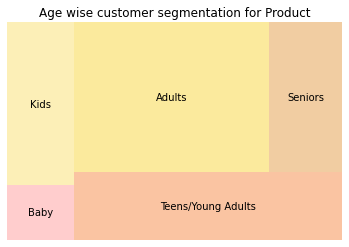

In [12]:
sizes=[5, 15, 25, 40,15]
label=["Baby","Kids","Teens/Young Adults", "Adults", "Seniors"]
squarify.plot(sizes=sizes, label=label, alpha=0.6,color=['#ffadad','#fae588','#f79d65','#f9dc5c','#e8ac65'])
plt.title('Age wise customer segmentation for Product')
plt.axis('off')
plt.show()

# Sample dataframe

In [13]:
data = {'labels': ["A","B","C","D","E","F","G"],
        'values':[10,20,25,35,10,25,45]}
df = pd.DataFrame(data)
df

,labels,values
0,A,10
1,B,20
2,C,25
3,D,35
4,E,10
5,F,25
6,G,45


#1. Creating a TreeMap with Squarify and Seaborn

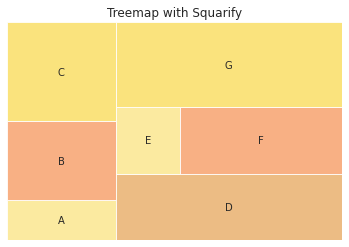

In [14]:
import squarify 
sns.set_style(style="whitegrid")
sizes= df["values"].values# proportions of the categories
label=df["labels"]
squarify.plot(sizes=sizes, label=label, alpha=0.8,color=colors).set(title='Treemap with Squarify')
plt.axis('off')
plt.show()

#2. Creating a TreeMap with Pygal

In [15]:
pip install CairoSVG

     |████████████████████████████████| 45 kB 3.7 MB/s 
     |████████████████████████████████| 88 kB 2.1 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.3.0-py3-none-any.whl size=89667 sha256=dc23c95b90711c35d3c7d003cf1cc0a88ba69e3ffadc0d07b74758c0a3ce60a4
  Stored in directory: /root/.cache/pip/wheels/4e/ca/e1/5c8a9692a27f639a07c949044bec943f26c81cd53d3805319f
Successfully built cairocffi


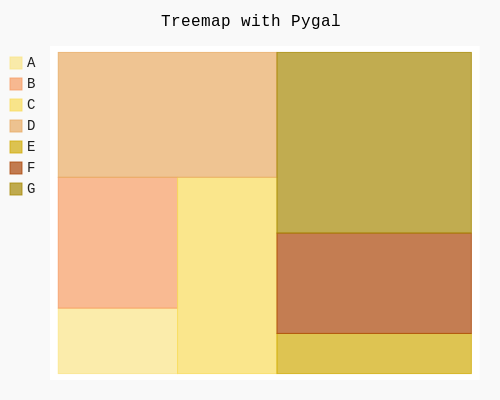

In [16]:
import pygal 
from pygal.style import Style
custom_style = Style(colors=colors) #define colors

treemap = pygal.Treemap(width=500, height=400, explicit_size=True,style=custom_style) # define size of the treemap
treemap.title = 'Treemap with Pygal'

#Treemap with sample dataframe
treemap.add(df['labels'].iloc[0], df["values"].iloc[0])
treemap.add(df['labels'].iloc[1], df["values"].iloc[1])
treemap.add(df['labels'].iloc[2], df["values"].iloc[2])
treemap.add(df['labels'].iloc[3], df["values"].iloc[3])
treemap.add(df['labels'].iloc[4], df["values"].iloc[4])
treemap.add(df['labels'].iloc[5], df["values"].iloc[5])
treemap.add(df['labels'].iloc[6], df["values"].iloc[6])
treemap #render the treemap


#3. Creating a TreeMap with Plotly

In [17]:
import plotly.express as px
fig = px.treemap(df, path=['labels'],values='values', title="Treemap with Plotly",width=800, height=400)
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))
fig.show()